In [1]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    text = re.sub('\[.,*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[ ]+',' ',text)
    return text


In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

man_ki_baat_sessions=['78','79','80','81','82','83','84','85']
data = {}
new_obj=WordNetLemmatizer()
for i, c in enumerate(man_ki_baat_sessions):
    with open("man_ki_baat/" + c + ".txt", "r",encoding="utf8") as f:
        list_of_words=[]
        for line in f:
            strip_lines=line.strip()
            strip_words=strip_lines.split()
            for word in strip_words:
                word=clean_text(word)
                stem_word = new_obj.lemmatize(word)
                if stem_word not in set(stopwords.words('english')) and len(stem_word)>3:
                    list_of_words.append(stem_word)

    data[c]=list_of_words
      
        

# Cleaning The Data

In [3]:
next(iter(data.keys()))

'78'

In [4]:
print(type(data.values()))

<class 'dict_values'>


In [5]:
next(iter(data.values()))

['dear',
 'countrymen ',
 'namaskar ',
 'often',
 'mann',
 'baat',
 'volley',
 'questions ',
 'time',
 'thought',
 'something',
 'different ',
 'asking',
 'questions ',
 'listen',
 'carefully',
 'questions ',
 'first',
 'indian',
 'individual',
 'gold',
 'olympics ',
 'game',
 'india',
 'maximum',
 'number',
 'medal',
 'olympics ',
 'player',
 'maximum',
 'number',
 'medal',
 'olympics ',
 'friends ',
 'send',
 'answer',
 'answering',
 'olympics',
 'quiz',
 'mygov',
 'several',
 'prizes ',
 'many',
 'question',
 'like',
 'road',
 'tokyo',
 'quiz',
 'mygov ',
 'participate',
 'road',
 'tokyo',
 'quiz ',
 'know',
 'india',
 'performed',
 'earlier ',
 'preparation',
 'tokyo',
 'olympics ',
 'know',
 'tell',
 'others',
 'too ',
 'want',
 'urge',
 'definitely',
 'participate',
 'quiz',
 'competition ',
 'friends ',
 'talking',
 'tokyo',
 'olympics ',
 'forget',
 'legendry',
 'athlete',
 'milkha',
 'singh ',
 'ago ',
 'corona',
 'snatched',
 'away',
 'hospital ',
 'opportunity',
 'talk',
 'h

In [6]:
# We are going to change this to key: session_number, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [7]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [8]:
data_combined

{'78': ['dear countrymen  namaskar  often mann baat volley questions  time thought something different  asking questions  listen carefully questions  first indian individual gold olympics  game india maximum number medal olympics  player maximum number medal olympics  friends  send answer answering olympics quiz mygov several prizes  many question like road tokyo quiz mygov  participate road tokyo quiz  know india performed earlier  preparation tokyo olympics  know tell others too  want urge definitely participate quiz competition  friends  talking tokyo olympics  forget legendry athlete milkha singh  ago  corona snatched away hospital  opportunity talk him  talking urged him  said represented india tokyo olympics  time player going olympics tokyo  boost morale athletes  motivate message  committed emotional sport immediately gave consent even illness  unfortunately  providence plans  still remember come surat inaugurated night marathon  interaction then  chat sport happened  inspired 

In [9]:
data_combined.keys()

dict_keys(['78', '79', '80', '81', '82', '83', '84', '85'])

In [10]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame(data_combined.values())
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
0,dear countrymen namaskar often mann baat volley questions time thought something different asking questions listen carefully questions first...
1,dear countrymen namaskar amazing picture taken couple ago memorable moment still front eyes hence commence mann baat time moments tokyo olym...
2,dear countrymen namaskar know today birth anniversary major dhyanchand country celebrates national sport day commemoration thought struck perh...
3,dear countrymen namaskar aware important programme leave america hence thought would record mann baat prior departure america mann baat septe...
4,dear countrymen namaskar namaskar billion times saying koti koti namaskar also since crossing crore vaccine doses country surging ahead zeal ...
5,dear countrymen namaskar connecting today mann baat later month december commencing and onset december psychologically feel o the year concl...
6,dear countrymen namaskar presently must amid preparation bidding farewell welcoming year every person every organization take resolution som...
7,dear countrymen namaskar today coming together another episode mann baat first mann baat today take forward discussion related positive insp...


In [12]:
# round1 = lambda x: clean_text_round1(x)
# # Let's take a look at the updated text
# data_clean = pd.DataFrame(data_df.transcript.apply(round1))
# data_clean

# Organizing The Data

I mentioned earlier that the output of this notebook will be clean, organized data in two standard text formats:

Corpus - a collection of text
Document-Term Matrix - word counts in matrix format
Corpus
We already created a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [14]:
sessions_number=['78','79','80','81','82','83','84','85']

data_df['sessions_number'] = sessions_number
data_df

,transcript,sessions_number
0,dear countrymen namaskar often mann baat volley questions time thought something different asking questions listen carefully questions first...,78
1,dear countrymen namaskar amazing picture taken couple ago memorable moment still front eyes hence commence mann baat time moments tokyo olym...,79
2,dear countrymen namaskar know today birth anniversary major dhyanchand country celebrates national sport day commemoration thought struck perh...,80
3,dear countrymen namaskar aware important programme leave america hence thought would record mann baat prior departure america mann baat septe...,81
4,dear countrymen namaskar namaskar billion times saying koti koti namaskar also since crossing crore vaccine doses country surging ahead zeal ...,82
5,dear countrymen namaskar connecting today mann baat later month december commencing and onset december psychologically feel o the year concl...,83
6,dear countrymen namaskar presently must amid preparation bidding farewell welcoming year every person every organization take resolution som...,84
7,dear countrymen namaskar today coming together another episode mann baat first mann baat today take forward discussion related positive insp...,85


In [15]:
# Let's pickle it for later use
data_df.to_pickle("corpus_mkb.pkl")

# Document-Term Matrix
For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [16]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_df.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_df.index
data_dtm

,aaba,aasa,aastha,abhiyan,abilities,ability,able,abode,abroad,abundance,...,youth,youtube,youtuber,zagreb,zakharin,zeal,zealand,zero,zest,zubani
0,0,0,0,0,0,0,3,0,0,0,...,3,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,6,1,1,0,0,0,1,0,0,0
2,0,0,0,3,0,1,0,0,2,0,...,8,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,8,0,0,0,0,0,0,0,0,0
4,4,0,0,2,0,0,0,0,0,0,...,3,0,0,0,0,2,0,0,0,0
5,0,2,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,1,1
6,0,0,0,0,1,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,2,0,1,0,1,2,0,...,9,0,0,1,0,0,0,1,0,0


In [17]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm_mkb.pkl")

In [19]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object

import pickle
data_df.to_pickle('data_clean_mkb.pkl')
pickle.dump(cv, open("cv_mkb.pkl", "wb"))

# Most Common Words Analysis

In [20]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm_mkb.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7
aaba,0,0,0,0,4,0,0,0
aasa,0,0,0,0,0,2,0,0
aastha,0,0,0,1,0,0,0,0
abhiyan,0,0,3,0,2,0,0,2
abilities,0,0,0,0,0,0,1,0


In [21]:
# Find the top 30 words said in each session
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('people', 26),
  ('country', 23),
  ('india', 18),
  ('friends', 17),
  ('tokyo', 16),
  ('corona', 13),
  ('player', 13),
  ('olympics', 13),
  ('water', 13),
  ('baat', 12),
  ('mann', 12),
  ('come', 12),
  ('tamil', 12),
  ('going', 11),
  ('village', 11),
  ('know', 10),
  ('time', 10),
  ('countrymen', 10),
  ('today', 9),
  ('want', 8),
  ('dear', 8),
  ('struggle', 8),
  ('year', 8),
  ('family', 7),
  ('guruprasad', 7),
  ('effort', 7),
  ('doctor', 7),
  ('freedom', 6),
  ('work', 6),
  ('best', 6)],
 1: [('country', 20),
  ('friends', 19),
  ('people', 18),
  ('india', 16),
  ('baat', 13),
  ('technology', 13),
  ('effort', 13),
  ('mann', 13),
  ('today', 13),
  ('year', 13),
  ('house', 12),
  ('work', 12),
  ('time', 11),
  ('georgia', 10),
  ('banana', 10),
  ('freedom', 9),
  ('like', 8),
  ('water', 8),
  ('amrit', 8),
  ('used', 8),
  ('come', 7),
  ('government', 7),
  ('dear', 7),
  ('apple', 7),
  ('mahotsav', 7),
  ('know', 7),
  ('friend', 6),
  ('different

In [22]:
# Print the top 15 words said in each session
for session_number, top_words in top_dict.items():
    print(session_number)
    print(', '.join([word for word, count in top_words]))
    print('---')

0
people, country, india, friends, tokyo, corona, player, olympics, water, baat, mann, come, tamil, going, village, know, time, countrymen, today, want, dear, struggle, year, family, guruprasad, effort, doctor, freedom, work, best
---
1
country, friends, people, india, baat, technology, effort, mann, today, year, house, work, time, georgia, banana, freedom, like, water, amrit, used, come, government, dear, apple, mahotsav, know, friend, different, youth, saint
---
2
sanskrit, bhagwan, people, world, country, vishwakarma, today, skill, village, want, time, friends, life, work, young, india, come, skilled, youth, krishna, sports, major, effort, sport, language, dear, know, family, book, dhyanchand
---
3
river, country, today, people, cleanliness, friends, campaign, india, know, water, tradition, medicinal, time, year, life, youth, freedom, team, world, plant, khadi, deen, generation, effort, dayal, rivers, connected, dear, unit, like
---
4
country, india, drone, people, police, friends, 

In [23]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each session
words = []
for session_number in data.columns:
    top = [word for (word, count) in top_dict[session_number]]
    for t in top:
        words.append(t)
        
words

['people',
 'country',
 'india',
 'friends',
 'tokyo',
 'corona',
 'player',
 'olympics',
 'water',
 'baat',
 'mann',
 'come',
 'tamil',
 'going',
 'village',
 'know',
 'time',
 'countrymen',
 'today',
 'want',
 'dear',
 'struggle',
 'year',
 'family',
 'guruprasad',
 'effort',
 'doctor',
 'freedom',
 'work',
 'best',
 'country',
 'friends',
 'people',
 'india',
 'baat',
 'technology',
 'effort',
 'mann',
 'today',
 'year',
 'house',
 'work',
 'time',
 'georgia',
 'banana',
 'freedom',
 'like',
 'water',
 'amrit',
 'used',
 'come',
 'government',
 'dear',
 'apple',
 'mahotsav',
 'know',
 'friend',
 'different',
 'youth',
 'saint',
 'sanskrit',
 'bhagwan',
 'people',
 'world',
 'country',
 'vishwakarma',
 'today',
 'skill',
 'village',
 'want',
 'time',
 'friends',
 'life',
 'work',
 'young',
 'india',
 'come',
 'skilled',
 'youth',
 'krishna',
 'sports',
 'major',
 'effort',
 'sport',
 'language',
 'dear',
 'know',
 'family',
 'book',
 'dhyanchand',
 'river',
 'country',
 'today',
 'pe

In [24]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('people', 8),
 ('country', 8),
 ('india', 8),
 ('friends', 8),
 ('know', 8),
 ('today', 8),
 ('dear', 8),
 ('effort', 7),
 ('baat', 6),
 ('mann', 6),
 ('year', 6),
 ('life', 6),
 ('come', 5),
 ('time', 5),
 ('countrymen', 5),
 ('work', 5),
 ('want', 4),
 ('freedom', 4),
 ('youth', 4),
 ('water', 3),
 ('village', 3),
 ('like', 3),
 ('world', 3),
 ('cleanliness', 3),
 ('family', 2),
 ('amrit', 2),
 ('government', 2),
 ('mahotsav', 2),
 ('friend', 2),
 ('different', 2),
 ('book', 2),
 ('river', 2),
 ('campaign', 2),
 ('culture', 2),
 ('indian', 2),
 ('school', 2),
 ('tokyo', 1),
 ('corona', 1),
 ('player', 1),
 ('olympics', 1),
 ('tamil', 1),
 ('going', 1),
 ('struggle', 1),
 ('guruprasad', 1),
 ('doctor', 1),
 ('best', 1),
 ('technology', 1),
 ('house', 1),
 ('georgia', 1),
 ('banana', 1),
 ('used', 1),
 ('apple', 1),
 ('saint', 1),
 ('sanskrit', 1),
 ('bhagwan', 1),
 ('vishwakarma', 1),
 ('skill', 1),
 ('young', 1),
 ('skilled', 1),
 ('krishna', 1),
 ('sports', 1),
 ('major', 1),
 ('s

In [25]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['people',
 'country',
 'india',
 'friends',
 'know',
 'today',
 'dear',
 'effort',
 'baat',
 'mann',
 'year',
 'life',
 'come',
 'time',
 'countrymen',
 'work']

In [60]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_mkb.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_mkb.pkl", "wb"))
data_stop.to_pickle("dtm_stop_mkb.pkl")

In [66]:
cv

CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [27]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

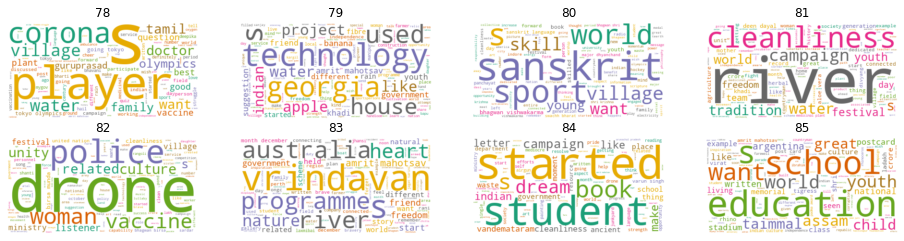

In [28]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

session_number = ['78', '79', '80', '81', '82', '83', '84', '85']

# Create subplots for each session
for index, session_no in enumerate(data.columns):
    wc.generate(data_clean.transcript[session_no])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(session_number[index])
    
plt.show()

In [29]:
# Find the number of unique words in each session

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for session_no in data.columns:
    uniques = data[session_no].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(session_number, unique_list)), columns=['session_number', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,session_number,unique_words
5,83,642
0,78,762
6,84,788
2,80,817
7,85,846
4,82,873
3,81,911
1,79,950


Text(0.5, 1.0, 'Number of Unique Words')

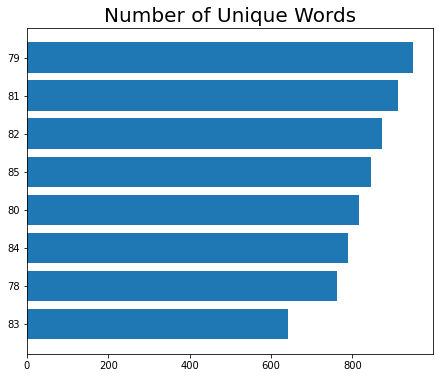

In [30]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.session_number)
plt.title('Number of Unique Words', fontsize=20)

# Sentiment of Routine

In [31]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus_mkb.pkl')
data

,transcript,sessions_number
0,dear countrymen namaskar often mann baat volley questions time thought something different asking questions listen carefully questions first...,78
1,dear countrymen namaskar amazing picture taken couple ago memorable moment still front eyes hence commence mann baat time moments tokyo olym...,79
2,dear countrymen namaskar know today birth anniversary major dhyanchand country celebrates national sport day commemoration thought struck perh...,80
3,dear countrymen namaskar aware important programme leave america hence thought would record mann baat prior departure america mann baat septe...,81
4,dear countrymen namaskar namaskar billion times saying koti koti namaskar also since crossing crore vaccine doses country surging ahead zeal ...,82
5,dear countrymen namaskar connecting today mann baat later month december commencing and onset december psychologically feel o the year concl...,83
6,dear countrymen namaskar presently must amid preparation bidding farewell welcoming year every person every organization take resolution som...,84
7,dear countrymen namaskar today coming together another episode mann baat first mann baat today take forward discussion related positive insp...,85


In [32]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,sessions_number,polarity,subjectivity
0,dear countrymen namaskar often mann baat volley questions time thought something different asking questions listen carefully questions first...,78,0.252326,0.482543
1,dear countrymen namaskar amazing picture taken couple ago memorable moment still front eyes hence commence mann baat time moments tokyo olym...,79,0.236808,0.523945
2,dear countrymen namaskar know today birth anniversary major dhyanchand country celebrates national sport day commemoration thought struck perh...,80,0.177887,0.454541
3,dear countrymen namaskar aware important programme leave america hence thought would record mann baat prior departure america mann baat septe...,81,0.148025,0.495264
4,dear countrymen namaskar namaskar billion times saying koti koti namaskar also since crossing crore vaccine doses country surging ahead zeal ...,82,0.159486,0.462916
5,dear countrymen namaskar connecting today mann baat later month december commencing and onset december psychologically feel o the year concl...,83,0.220090,0.462089
6,dear countrymen namaskar presently must amid preparation bidding farewell welcoming year every person every organization take resolution som...,84,0.212138,0.524266
7,dear countrymen namaskar today coming together another episode mann baat first mann baat today take forward discussion related positive insp...,85,0.207832,0.479980


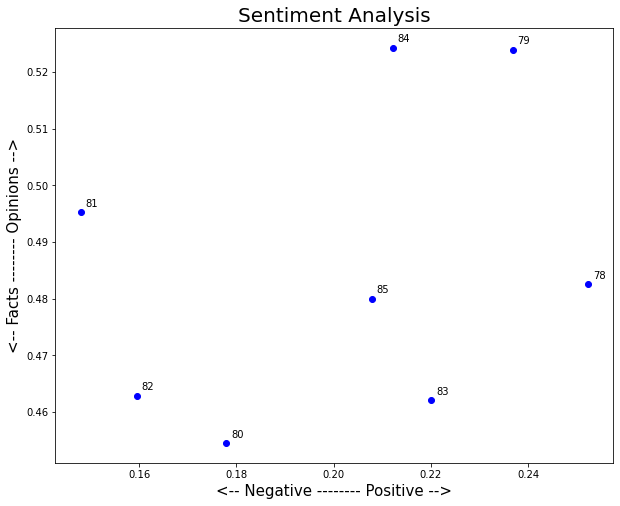

In [33]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, sessions_no in enumerate(data.index):
    x = data.polarity.loc[sessions_no]
    y = data.subjectivity.loc[sessions_no]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['sessions_number'][index], fontsize=10)
#     plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Topic Modeling - Attempt #1 (All Text)

In [34]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop_mkb.pkl')
data

,aaba,aasa,aastha,abhiyan,abilities,ability,able,abode,abroad,abundance,...,youth,youtube,youtuber,zagreb,zakharin,zeal,zealand,zero,zest,zubani
0,0,0,0,0,0,0,3,0,0,0,...,3,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,6,1,1,0,0,0,1,0,0,0
2,0,0,0,3,0,1,0,0,2,0,...,8,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,8,0,0,0,0,0,0,0,0,0
4,4,0,0,2,0,0,0,0,0,0,...,3,0,0,0,0,2,0,0,0,0
5,0,2,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,1,1
6,0,0,0,0,1,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,2,0,1,0,1,2,0,...,9,0,0,1,0,0,0,1,0,0


In [35]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [36]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,0,1,2,3,4,5,6,7
aaba,0,0,0,0,4,0,0,0
aasa,0,0,0,0,0,2,0,0
aastha,0,0,0,1,0,0,0,0
abhiyan,0,0,3,0,2,0,0,2
abilities,0,0,0,0,0,0,1,0


In [37]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [69]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop_mkb.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [70]:
cv

CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [39]:
for i in range(5,10):
    lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, passes=100,random_state=42)
    print('keywords for {} topics '.format(i))
    
    for j in lda.print_topics():
        print(j)
              
    print('=====================================================================')

keywords for 5 topics 
(0, '0.000*"moving" + 0.000*"citizen" + 0.000*"east" + 0.000*"indigenous" + 0.000*"glory" + 0.000*"pledge" + 0.000*"meaning" + 0.000*"happened" + 0.000*"spent" + 0.000*"connection"')
(1, '0.006*"started" + 0.006*"vrindavan" + 0.004*"student" + 0.004*"mahotsav" + 0.004*"freedom" + 0.003*"month" + 0.003*"start" + 0.003*"government" + 0.003*"campaign" + 0.003*"amrit"')
(2, '0.011*"sanskrit" + 0.008*"bhagwan" + 0.007*"world" + 0.006*"vishwakarma" + 0.006*"skill" + 0.005*"village" + 0.005*"want" + 0.005*"young" + 0.004*"major" + 0.004*"youth"')
(3, '0.006*"water" + 0.006*"river" + 0.005*"freedom" + 0.004*"campaign" + 0.004*"corona" + 0.004*"like" + 0.004*"village" + 0.003*"cleanliness" + 0.003*"tokyo" + 0.003*"youth"')
(4, '0.006*"drone" + 0.006*"culture" + 0.005*"want" + 0.004*"police" + 0.004*"woman" + 0.004*"world" + 0.004*"vaccine" + 0.004*"school" + 0.004*"education" + 0.003*"national"')
keywords for 6 topics 
(0, '0.013*"river" + 0.008*"cleanliness" + 0.006*"cam

## Topic Modeling - Attempt #2 (Nouns Only)

In [40]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [41]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean_mkb.pkl')
data_clean

,transcript,sessions_number
0,dear countrymen namaskar often mann baat volley questions time thought something different asking questions listen carefully questions first...,78
1,dear countrymen namaskar amazing picture taken couple ago memorable moment still front eyes hence commence mann baat time moments tokyo olym...,79
2,dear countrymen namaskar know today birth anniversary major dhyanchand country celebrates national sport day commemoration thought struck perh...,80
3,dear countrymen namaskar aware important programme leave america hence thought would record mann baat prior departure america mann baat septe...,81
4,dear countrymen namaskar namaskar billion times saying koti koti namaskar also since crossing crore vaccine doses country surging ahead zeal ...,82
5,dear countrymen namaskar connecting today mann baat later month december commencing and onset december psychologically feel o the year concl...,83
6,dear countrymen namaskar presently must amid preparation bidding farewell welcoming year every person every organization take resolution som...,84
7,dear countrymen namaskar today coming together another episode mann baat first mann baat today take forward discussion related positive insp...,85


In [42]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
0,countrymen baat questions time something questions questions gold olympics game number medal olympics player number olympics friends answer olympi...
1,countrymen picture couple moment eyes commence mann baat time moments olympics sportspersons tricolour country country vijayi bhava sportspersons ...
2,countrymen today dhyanchand country sport day commemoration dhyanchand ji soul moment dhyanchand ji s hockey glory hockey world decade years daugh...
3,countrymen programme hence thought mann departure america mann september count date wise days days sons daughters list year relevance tradition in...
4,countrymen times koti koti namaskar crore vaccine country zeal energy success vaccine programme display capability manifests friends vaccine lakh ...
5,countrymen today baat month commencing december year month year sketching plan year month country force flag day december country jubilee war occa...
6,countrymen preparation bidding farewell year person organization resolution something year years baat society country years baat government media ...
7,countrymen today episode mann baat baat today discussion inspiration effort country countrymen today death anniversary mahatma gandhi reminds bapu...


In [43]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaba,aasa,aastha,abhiyan,abilities,ability,abundance,accelerate,acceptance,accident,...,yes,yoga,youth,youtuber,zagreb,zakharin,zeal,zealand,zest,zubani
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,4,1,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,1,0,...,1,0,4,0,0,1,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,...,0,0,5,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,2,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
6,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,1,0,1,0,0,...,0,1,8,0,1,0,0,0,0,0


In [44]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [45]:
for i in range(5,10):
    lda = models.LdaModel(corpus=corpusn, id2word=id2wordn, num_topics=i, passes=100,random_state=42)
    print('keywords for {} topics '.format(i))
    
    for j in lda.print_topics():
        print(j)
              
    print('=====================================================================')

keywords for 5 topics 
(0, '0.018*"river" + 0.011*"campaign" + 0.011*"cleanliness" + 0.009*"water" + 0.007*"tradition" + 0.007*"freedom" + 0.007*"team" + 0.007*"world" + 0.006*"generation" + 0.006*"plant"')
(1, '0.015*"drone" + 0.011*"police" + 0.010*"woman" + 0.009*"culture" + 0.008*"vaccine" + 0.007*"munda" + 0.007*"birsa" + 0.006*"ministry" + 0.006*"nation" + 0.006*"village"')
(2, '0.009*"water" + 0.008*"world" + 0.007*"freedom" + 0.006*"mahotsav" + 0.006*"culture" + 0.005*"family" + 0.005*"olympics" + 0.005*"government" + 0.005*"technology" + 0.005*"youth"')
(3, '0.011*"world" + 0.010*"sanskrit" + 0.008*"bhagwan" + 0.008*"book" + 0.007*"student" + 0.007*"language" + 0.007*"village" + 0.006*"campaign" + 0.005*"person" + 0.005*"waste"')
(4, '0.001*"courage" + 0.001*"pledge" + 0.001*"force" + 0.001*"children" + 0.001*"satisfaction" + 0.001*"word" + 0.001*"confidence" + 0.001*"joy" + 0.001*"fact" + 0.001*"region"')
keywords for 6 topics 
(0, '0.019*"river" + 0.012*"campaign" + 0.012*"c

# Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [46]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [47]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
0,dear countrymen mann baat questions time thought something different questions questions indian individual gold olympics game maximum number medal...
1,dear countrymen amazing picture couple memorable moment front eyes commence mann baat time moments olympics indian sportspersons tricolour entire ...
2,dear countrymen today anniversary major dhyanchand country national sport day commemoration struck major dhyanchand ji s soul moment overjoyed dhy...
3,dear countrymen aware important programme hence thought mann prior departure america mann september important count date wise days myriad days you...
4,dear countrymen namaskar namaskar times koti koti namaskar crore vaccine country zeal energy success vaccine programme display capability manifest...
5,dear countrymen today baat month commencing december year last month year sketching plan year month country force flag day december country golden...
6,dear countrymen preparation bidding farewell year person organization resolution something year last years mann baat goodness individual society c...
7,dear countrymen today episode mann baat baat today forward discussion positive inspiration collective effort country countrymen today death annive...


In [48]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [49]:
for i in range(3,10):
    lda = models.LdaModel(corpus=corpusna, id2word=id2wordna, num_topics=i, passes=200,random_state=42)
    print('keywords for {} topics '.format(i))
    
    for j in lda.print_topics():
        print(j)
              
    print('=====================================================================')

keywords for 3 topics 
(0, '0.008*"sanskrit" + 0.008*"bhagwan" + 0.007*"village" + 0.007*"drone" + 0.006*"police" + 0.005*"cleanliness" + 0.005*"woman" + 0.005*"unity" + 0.005*"vishwakarma" + 0.004*"nation"')
(1, '0.006*"corona" + 0.005*"vrindavan" + 0.005*"olympics" + 0.005*"tokyo" + 0.005*"player" + 0.004*"struggle" + 0.004*"student" + 0.004*"book" + 0.003*"month" + 0.003*"pradesh"')
(2, '0.006*"river" + 0.005*"cleanliness" + 0.004*"education" + 0.004*"technology" + 0.004*"school" + 0.004*"house" + 0.004*"khadi" + 0.003*"independence" + 0.003*"national" + 0.003*"woman"')
keywords for 4 topics 
(0, '0.015*"sanskrit" + 0.010*"bhagwan" + 0.008*"vishwakarma" + 0.008*"village" + 0.006*"skill" + 0.006*"sports" + 0.005*"language" + 0.005*"book" + 0.004*"city" + 0.004*"sport"')
(1, '0.007*"student" + 0.005*"dream" + 0.005*"book" + 0.005*"vandemataram" + 0.004*"resource" + 0.004*"department" + 0.004*"singh" + 0.004*"school" + 0.004*"moment" + 0.004*"ancient"')
(2, '0.006*"drone" + 0.005*"poli

# it is found that with only nouns , number of topics as 8 and passes at 100 we can differentiate the topics on similar lines

In [71]:
lda = models.LdaModel(corpus=corpusn, id2word=id2wordn, num_topics=8, passes=100,random_state=42)
print('keywords for 8 topics ')

for j in lda.print_topics():
    print(j)

print('=====================================================================')

keywords for 8 topics 
(0, '0.020*"river" + 0.013*"campaign" + 0.013*"cleanliness" + 0.010*"water" + 0.008*"tradition" + 0.008*"team" + 0.008*"freedom" + 0.008*"world" + 0.007*"generation" + 0.007*"plant"')
(1, '0.001*"thing" + 0.001*"number" + 0.001*"police" + 0.001*"generation" + 0.001*"sanskrit" + 0.001*"suggestion" + 0.001*"power" + 0.001*"family" + 0.001*"opportunity" + 0.001*"book"')
(2, '0.010*"world" + 0.009*"education" + 0.009*"culture" + 0.009*"vrindavan" + 0.008*"school" + 0.007*"mahotsav" + 0.006*"youth" + 0.006*"example" + 0.006*"river" + 0.005*"child"')
(3, '0.009*"technology" + 0.007*"house" + 0.007*"government" + 0.007*"freedom" + 0.007*"campaign" + 0.006*"student" + 0.006*"place" + 0.006*"water" + 0.005*"thing" + 0.005*"opportunity"')
(4, '0.017*"drone" + 0.013*"police" + 0.012*"woman" + 0.010*"culture" + 0.009*"vaccine" + 0.008*"munda" + 0.008*"birsa" + 0.007*"nation" + 0.007*"village" + 0.007*"ministry"')
(5, '0.001*"campaign" + 0.001*"tradition" + 0.001*"tamil" + 0.

We can settle with the topics as

0. river, water, cleanliness, campaign
1. police, power
2. world, education, culture, youth
3. technology, house, government
4. drone, police, vaccine
5. tradition, mahotsav, tamil
6. tokyo olympics, players, corona
7. sanskrit, bhagwan, vishwakarma


In [72]:
corpus_transformed = lda[corpusn]

In [73]:
print(type(corpus_transformed))
for i in corpus_transformed:
#     print(a)
#     print(b)
    print(i)

<class 'gensim.interfaces.TransformedCorpus'>
[(6, 0.9986715)]
[(3, 0.9988902)]
[(7, 0.9987669)]
[(0, 0.99890286)]
[(4, 0.99887174)]
[(2, 0.9981129)]
[(3, 0.99851567)]
[(2, 0.99877363)]


In [737]:

match_list=list(zip([a for [(a,b)] in corpus_transformed], data_clean.sessions_number))
for i in match_list:
    print(i)

(6, '78')
(3, '79')
(7, '80')
(0, '81')
(4, '82')
(2, '83')
(3, '84')
(2, '85')


This implies:
1. 78th session talks about topic 6:tokyo olympics, players, corona
2. 79th session talks about topic 3:technology, house, government
3. 80th session talks about topic 7:sanskrit, bhagwan, vishwakarma
4. 81st session talks about topic 0:river, water, cleanliness, campaign
5. 82nd session talks about topic 4:drone, police, vaccine
6. 83rd session talks about topic 2:world, education, culture, youth
7. 84th session talks about topic 3:technology, house, government
8. 85th session talks about topic 2:world, education, culture, youth